<a href="https://colab.research.google.com/github/bialyy10/Uczenie_maszynowe_w_finansach_1/blob/main/case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install surprise
from surprise import Dataset, Reader
from surprise import SVD, KNNBaseline
from surprise.model_selection import cross_validate, GridSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162992 sha256=9b9ea8d03e614d0fe7ee804ded7c70cb0c5fe0d0d27bcd8f4847c0e626ee318f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# **Zadanie 1**

In [5]:
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]
num_sci_fi_movies = sci_fi_movies.shape[0]
print("Liczba filmów Sci-Fi:", num_sci_fi_movies)

Liczba filmów Sci-Fi: 980


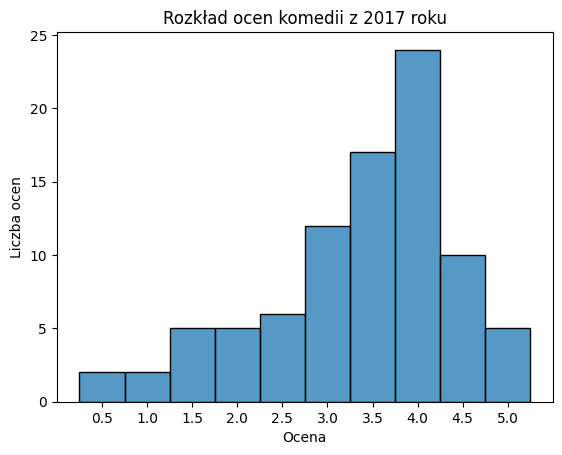

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Łączenie tabel
data = pd.merge(ratings, movies, on='movieId')
# Filtrowanie komedii z 2017 roku
comedy_2017 = data[(data['genres'].str.contains('Comedy')) & (data['title'].str.contains('2017'))]

# Definiowanie krawędzi przedziałów dla histogramu
edges = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]

# Etykiety ocen do wyświetlenia na osi X
ratings_labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Rysowanie histogramu
sns.histplot(comedy_2017['rating'], bins=edges, kde=False)

plt.xticks(ratings_labels)
plt.title('Rozkład ocen komedii z 2017 roku')
plt.xlabel('Ocena')
plt.ylabel('Liczba ocen')

# Wyświetlenie wykresu
plt.show()


In [7]:
comedy_2017.head()

,userId,movieId,rating,timestamp,title,genres
57556,18,176101,3.5,1513110715,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
57557,50,176101,1.0,1514498012,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
57558,111,176101,4.0,1516154835,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
57559,184,176101,3.5,1537109645,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
57560,212,176101,3.0,1527796034,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy


In [8]:
# Filtrowanie filmów akcji
action_movies = data[data['genres'].str.contains('Action')]
# Średnia ocen filmów akcji
average_rating_action = action_movies['rating'].mean()
print("Średnia ocena filmów akcji:", average_rating_action)
# najczęściej oceniane filmy akcji
top_rated_action_movies = action_movies['title'].value_counts().head(3)
print("Trzy najczęściej oceniane filmy akcji:", top_rated_action_movies)

Średnia ocena filmów akcji: 3.447984331646809
Trzy najczęściej oceniane filmy akcji: title
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Name: count, dtype: int64


# Zadanie 2

In [13]:
# Przygotowanie danych do biblioteki Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [14]:
# Użycie algorytmu SVD
algo_svd = SVD()
cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8666  0.8750  0.8818  0.8737  0.8721  0.8738  0.0049  
MAE (testset)     0.6659  0.6721  0.6768  0.6703  0.6686  0.6707  0.0037  
Fit time          6.80    7.96    7.88    1.86    1.86    5.27    2.82    
Test time         1.18    0.53    0.14    0.17    0.33    0.47    0.38    


{'test_rmse': array([0.86656127, 0.87496362, 0.88176264, 0.87367613, 0.87205477]),
 'test_mae': array([0.66587432, 0.67210643, 0.67681106, 0.67028418, 0.66856328]),
 'fit_time': (6.797895431518555,
  7.9560277462005615,
  7.879525899887085,
  1.8550968170166016,
  1.8564198017120361),
 'test_time': (1.1800942420959473,
  0.528273344039917,
  0.14349102973937988,
  0.16501736640930176,
  0.3300790786743164)}

In [15]:
# Użycie algorytmu kNN Baseline
algo_knn = KNNBaseline()
cross_validate(algo_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8675  0.8786  0.8725  0.8769  0.8773  0.8746  0.0041  
MAE (testset)     0.6612  0.6694  0.6665  0.6726  0.6702  0.6680  0.0039  
Fit time          0.52    0.64    0.63    0.81    0.56    0.63    0.10    
Test time         1.82    2.25    2.20    1.73    1.81    1.96    0.22    


{'test_rmse': array([0.86752123, 0.87858101, 0.87248168, 0.87689922, 0.87726847]),
 'test_mae': array([0.66118083, 0.66940704, 0.66653585, 0.67259934, 0.67017473]),
 'fit_time': (0.5170490741729736,
  0.6397922039031982,
  0.6345322132110596,
  0.811715841293335,
  0.5617847442626953),
 'test_time': (1.8247671127319336,
  2.2503879070281982,
  2.1953673362731934,
  1.7256543636322021,
  1.8064191341400146)}

In [18]:
# Definicja parametrów dla kNN
param_grid = {'k': [2, 3, 4, 5, 6], 'sim_options': {'name': ['msd', 'cosine'], 'user_based': [True, False]}}
gs_knn = GridSearchCV(KNNBaseline, param_grid, measures=['RMSE', 'MAE'], cv=5)
gs_knn.fit(data)

# Wyniki GridSearch dla kNN Baseline
print(gs_knn.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [21]:
trainset = data.build_full_trainset()

# Trenowanie modelu KNN Baseline z k = 6
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo_knn = KNNBaseline(k=6, sim_options=sim_options)
algo_knn.fit(trainset)

# Walidacja krzyżowa dla KNN Baseline
results_knn = cross_validate(algo_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8895  0.8797  0.8745  0.8793  0.8773  0.8801  0.0051  
MAE (testset)     0.6764  0.6685  0.6662  0.6662  0.6679  0.6691  0.0038  
Fit time   

In [27]:
def knn_recommendations(movie_title, algo, n=5):
    # Znalezienie wewnętrznego ID filmu
    movie_id = movies[movies['title'] == movie_title]['movieId'].iloc[0]
    movie_inner_id = algo.trainset.to_inner_iid(movie_id)

    # Pobieranie sąsiadów
    neighbors_inner_ids = algo.get_neighbors(movie_inner_id, k=n)
    neighbors_movie_ids = [algo.trainset.to_raw_iid(inner_id) for inner_id in neighbors_inner_ids]
    recommended_movies = movies[movies['movieId'].isin(neighbors_movie_ids)]

    return recommended_movies[['title', 'genres']]

# Przykład wywołania dla "Penguins of Madagascar"
print("Rekomendacje po obejrzeniu 'Penguins of Madagascar' (KNN):")
print(knn_recommendations('Penguins of Madagascar (2014)', algo_knn))

# Przykład wywołania dla "The Hobbit: The Desolation of Smaug, The"
print("Rekomendacje po obejrzeniu 'Hobbit: The Desolation of Smaug, The' (KNN):")
print(knn_recommendations('Hobbit: The Desolation of Smaug, The (2013)', algo_knn))


Rekomendacje po obejrzeniu 'Penguins of Madagascar' (KNN):
                                                title  \
1284                         Good Will Hunting (1997)   
2836                                     X-Men (2000)   
5166  Harry Potter and the Prisoner of Azkaban (2004)   
5269                     Bourne Supremacy, The (2004)   
6760                             Kung Fu Panda (2008)   

                                     genres  
1284                          Drama|Romance  
2836                Action|Adventure|Sci-Fi  
5166                 Adventure|Fantasy|IMAX  
5269                  Action|Crime|Thriller  
6760  Action|Animation|Children|Comedy|IMAX  
Rekomendacje po obejrzeniu 'Hobbit: The Desolation of Smaug, The' (KNN):
                                                  title  \
3638  Lord of the Rings: The Fellowship of the Ring,...   
4800  Lord of the Rings: The Return of the King, The...   
6710                            Dark Knight, The (2008)   
6743         

In [32]:
# Trenowanie modelu SVD
algo_svd = SVD()
algo_svd.fit(trainset)

# Walidacja krzyżowa dla SVD
results_svd = cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8784  0.8742  0.8746  0.8690  0.8783  0.8749  0.0035  
MAE (testset)     0.6757  0.6702  0.6724  0.6683  0.6730  0.6719  0.0025  
Fit time          2.15    1.72    1.76    2.66    2.21    2.10    0.34    
Test time         0.14    0.36    0.22    0.14    0.13    0.20    0.09    
